


# Vamos encher o carrinho!

# Introdução

A Instacart é uma plataforma de entrega de supermercado onde os clientes podem fazer um pedido de supermercado e receber a compra em casa, semelhante ao funcionamento do Uber Eats e do iFood. O conjunto de dados foi modificado do original.

Conforme eu vá avançando na aplicação das técnicas de python, eu irei explicando o que será feito.



## Dicionário de dados

Há cinco tabelas no conjunto de dados, abaixo está um dicionário que lista as colunas de cada tabela e descreve os dados contidos nelas.

- `instacart_orders.csv`: cada linha corresponde a um pedido no aplicativo da Instacart
    - `'order_id'`: é o número de identificação unívoco de cada pedido
    - `'user_id'`: é o número de identificação unívoco da conta de cada cliente
    - `'order_number'`: é o número de vezes que o cliente fez um pedido
    - `'order_dow'`: é o dia da semana em que o pedido foi feito (0 é domingo)
    - `'order_hour_of_day'`: é a hora do dia em que o pedido foi feito
    - `'days_since_prior_order'`: é o número de dias desde que o cliente fez seu pedido anterior




- `products.csv`: cada linha corresponde a um produto unívoco que os clientes podem comprar
    - `'product_id'`: é o número de identificação unívoco de cada produto
    - `'product_name'`: é o nome do produto
    - `'aisle_id'`: é o número de identificação unívoco de cada categoria de seção do supermercado
    - `'department_id'`: é o número de identificação unívoco de cada categoria de departamento do supermercado




-	`order_products.csv`: cada linha corresponde a um item incluído em um pedido
    -	`'order_id'`: é o número de identificação unívoco de cada pedido
    -	`'product_id'`: é o número de identificação unívoco de cada produto
    -	`'add_to_cart_order'`: é a ordem sequencial em que cada item foi colocado no carrinho
    -	`'reordered'`: 0 se o cliente nunca comprou o produto antes, 1 se já o comprou




-	`aisles.csv`
    -	`'aisle_id'`: é o número de identificação unívoco de cada categoria de seção do supermercado
    -	`'aisle'`: é o nome da seção



-	`departments.csv`
    -	`'department_id'`: é o número de identificação unívoco de cada categoria de departamento do supermercado
    -	`'department'`: é o nome do departamento


# Etapa 1. Visão geral dos dados

Etapa de importação das bibliotecas Python, importação dos dados das tabelas e também mostrar preliminarmente os dados.


In [59]:
import pandas as pd
from matplotlib import pyplot as plt

**Utilizamos o argumento `sep` porque os dados CSV deveriam estar separados por ',' porém estavam separados por ';':**

In [2]:
df_insta = pd.read_csv('instacart_orders.csv', sep=';')
df_prod = pd.read_csv('products.csv', sep=';')
df_aisle = pd.read_csv('aisles.csv', sep=';')
df_depar = pd.read_csv('departments.csv', sep=';')
df_ord = pd.read_csv('order_products.csv', sep=';')

In [3]:
df_insta.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [4]:
df_prod.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [5]:
df_aisle.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [6]:
df_depar.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [7]:
df_ord.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


## Conclusões

Os dados estão consistentes e bem organizados, porém é preciso verificar valores duplicados e ausentes e também limpar os dados para que tenhamos uma análise mais segura.

# Etapa 2. Preparação de dados

-	Verificação e correção os tipos de dados
-	Identificação e preenchimento de valores ausentes
-	Identificação e remoção de valores duplicados


## Plano de solução

Meu plano para essa seção são os códigos de correção do tipo de dados, como por exemplo: str, int, float, etc.. e também procurar por valores ausentes usando a fórmula ISNA e podemos preencher estes valores com a método FILLNA e também o replace e, por fim, podemos verificar os dados duplicados com o método DUPLICATED e removê-los com o método DROP.DUPLICATES.

### DataFrame `orders`

In [8]:
duplicated_rows = df_insta[df_insta.duplicated(keep=False)]
print(duplicated_rows)
print()
print("A soma do número de linhas duplicados no Dataframe é: ", df_insta.duplicated().sum())

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
30371    1918001   188546            14          3                  2   
99462     794638    50898            24          3                  2   
119251    408114    68324             4          3                  2   
142258   2845099    31189            11          3                  2   
145574    794638    50898            24          3                  2   
164581   1112182   202304            84          3                  2   
200059   1782114   106752             1          3                  2   
204042   2125197    14050            48          3                  2   
215294   2160484   107525            16          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
242618   1021560    53767             3          3                  2   
250626    467134    63189            21          3 

<span style="color:green;">O que podemos notar no DataFrame é que todos pedidos duplicados tem em comum o dia da semana: dia 3 (quarta-feira) e a hora da semana: 2 (2 horas da manhã).</span>

**Verificando todos os pedidos feitos às 2 horas da manhã nas quartas-feiras:**

In [61]:
def orders_day_hour(df_insta, order_dow, order_hour_of_day):
    df_filtered_day = df_insta[df_insta['order_dow'] == 3]
    df_filtered_day_hour = df_filtered_day[df_filtered_day['order_hour_of_day'] == 2]
    
    order_day_hour = df_filtered_day_hour['order_id']
    
    return order_day_hour
    
result = orders_day_hour(df_insta, 3, 2)
result.reset_index(drop=True)

0      2766110
1      2190225
2       553049
3       382357
4       690242
        ...   
101    3384021
102     910166
103    1680532
104     222962
105    2592344
Name: order_id, Length: 106, dtype: int64

<span style="color:green;">Este resultado quer dizer que nós temos 106 pedidos feitos às 2 horas da manhã na quarta-feira.</span>

**Removendo os pedidos duplicados:**

In [10]:
df_insta.drop_duplicates(inplace=True)

**Verificando se os dados foram removidos:**

In [11]:
df_insta.duplicated().sum()

0

<span style="color:green;">Olhando para o Dataframe, notamos que haviam 15 linhas duplicadas que identificamos pelo dia "3" (quarta-feira) e pela hora "2" (2 horas da manhã). A partir disso, consegui limpar os dados usando os métodos de pandas certos para removê-los para deixar nossa análise mais clara.</span>

### DataFrame `products`

**Verificando os produtos duplicados explícitos:**

In [12]:
df_prod.duplicated().sum()

0

**Verificando se há IDs de departamentos duplicados:**

In [13]:
df_filtered_3 = df_prod['product_id'].duplicated().sum()
print(df_filtered_3)

0


**Verificando os produtos duplicados implícitos:**

In [14]:
df_lower = df_prod['product_name'].str.lower()
print(df_lower.head())
print()
duplicated_prod = df_lower.duplicated().sum()
print("A soma de produtos duplicados no Dataframe é de: ", duplicated_prod)
print()
print(df_lower[df_lower.duplicated()])

0                           chocolate sandwich cookies
1                                     all-seasons salt
2                 robust golden unsweetened oolong tea
3    smart ones classic favorites mini rigatoni wit...
4                            green chile anytime sauce
Name: product_name, dtype: object

A soma de produtos duplicados no Dataframe é de:  1361

71                                                   NaN
109                                                  NaN
296                                                  NaN
416                                                  NaN
436                                                  NaN
                              ...                       
49689                      high performance energy drink
49690                      original pancake & waffle mix
49691    organic instant oatmeal light maple brown sugar
49692                             spring water body wash
49693                            burrito- steak & cheese
Name: p

**Removendo os valores "NaN" e organizando os dados:**

In [15]:
df_lower.dropna(inplace=True)
print(df_lower.value_counts().sort_values(ascending=False))
print()
duplicated_prod = df_lower.duplicated().sum()
print("A soma de produtos duplicados no Dataframe é de: ", duplicated_prod)

product_name
green tea with ginseng and honey    3
herring in wine sauce               2
megaflora probiotic                 2
yams cut sweet potatoes in syrup    2
gluten free spaghetti               2
                                   ..
cabernet tomatoes                   1
brie with herbs foil wedge          1
organic creamed coconut             1
professionals sleek shampoo         1
fresh foaming cleanser              1
Name: count, Length: 48332, dtype: int64

A soma de produtos duplicados no Dataframe é de:  104


<span style="color:green;">Verificamos nessa questão que haviam 1361 produtos duplicados e muitos deles eram "NaNs" e logo depois eu retirei os mesmos com o método "dropna" e achei o novo número de produtos duplicados que é 104.</span>

### DataFrame `departments`

**Verificando dados duplicados no DataFrame:**

In [18]:
df_depar.duplicated().sum()

0

**Verificando dados duplicados somente na coluna departament_ID:**

In [16]:
df_filtered_3 = df_depar['department_id'].duplicated().sum()
df_filtered_3

0

<span style="color:green;">Não foram encontrados dados duplicados.</span>

### DataFrame `aisles`

**Verificando dados duplicados no DataFrame:**

In [18]:
df_aisle.duplicated().sum()

0

**Verificando dados duplicados somente na coluna aisle_ID:**

In [21]:
df_filtered_4 = df_aisle['aisle_id'].duplicated().sum()
df_filtered_4

0

<span style="color:green;">Não foram encontrados dados duplicados.</span>

### DataFrame `order_products`

**Verificando dados duplicados no DataFrame:**

In [19]:
df_ord.duplicated().sum()

0

In [60]:
duplicated_order = df_ord[df_ord.duplicated(keep=False)]
print(duplicated_order)

Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered, reordered_new]
Index: []


<span style="color:green;">Não foram encontrados dados duplicados.</span>

## Encontrando e removendo valores ausentes


Precisaremos investigar valores ausentes seguintes colunas:

*	A coluna `'product_name'` da tabela products.
*	A coluna `'days_since_prior_order'` da tabela orders.
*	A coluna `'add_to_cart_order'` da tabela order_products.


### DataFrame `products`

**Verificando dados ausente na coluna 'product name' no DataFrame:**

In [23]:
print(df_prod['product_name'].isna().sum())
print()
print(df_prod['product_name'].value_counts(dropna=False))

1258

product_name
NaN                                      1258
Chocolate Sandwich Cookies                  1
Krinkle Cut Carolina BBQ Potato Chips       1
Fresh Ground Turkey- 85% Lean/15% Fat       1
Organic Unsweetened Ketchup                 1
                                         ... 
Organic Fresh Carrot Chips                  1
Unbleached Jumbo Baking Cups                1
Super Glue Gel Control                      1
3 Cheese Ravioli                            1
BURRITO- STEAK & CHEESE                     1
Name: count, Length: 48437, dtype: int64


<span style="color:green;">Filtrando o DataFrame, vemos que temos 1258 valores ausentes na coluna 'product_name'.</span>

**Verificando se os dados ausente na coluna 'aisle_id' são todos relacionados ao aisle 100 no DataFrame:**

In [24]:
print(df_prod[df_prod['aisle_id'] == 100].head(15))
print()
print(df_prod[df_prod['aisle_id'] == 100].tail(15))
print()
print(df_prod[df_prod['aisle_id'] == 100].sample(15))

     product_id product_name  aisle_id  department_id
37           38          NaN       100             21
71           72          NaN       100             21
109         110          NaN       100             21
296         297          NaN       100             21
416         417          NaN       100             21
436         437          NaN       100             21
439         440          NaN       100             21
471         472          NaN       100             21
490         491          NaN       100             21
555         556          NaN       100             21
561         562          NaN       100             21
613         614          NaN       100             21
623         624          NaN       100             21
689         690          NaN       100             21
767         768          NaN       100             21

       product_id product_name  aisle_id  department_id
48886       48887          NaN       100             21
49016       49017      

<span style="color:green;">Como pode-se notar, todos os valores ausentes se encontrava no 'aisle_id' = 100.</span>

**Verificando se os dados ausente na coluna 'department_id' são todos relacionados ao departamento 21 no DataFrame:**

In [25]:
print(df_prod[df_prod['department_id'] == 21].head(15))
print()
print(df_prod[df_prod['department_id'] == 21].tail(15))
print()
print(df_prod[df_prod['department_id'] == 21].sample(15))

     product_id product_name  aisle_id  department_id
37           38          NaN       100             21
71           72          NaN       100             21
109         110          NaN       100             21
296         297          NaN       100             21
416         417          NaN       100             21
436         437          NaN       100             21
439         440          NaN       100             21
471         472          NaN       100             21
490         491          NaN       100             21
555         556          NaN       100             21
561         562          NaN       100             21
613         614          NaN       100             21
623         624          NaN       100             21
689         690          NaN       100             21
767         768          NaN       100             21

       product_id product_name  aisle_id  department_id
48886       48887          NaN       100             21
49016       49017      

<span style="color:green;">Como pode-se notar, todos os valores ausentes se encontrava no 'department_id' = 21.</span>

**Verificando as duas colunas em conjunto:**

In [27]:
print(df_depar[df_depar['department_id'] == 21].head())
print()
print(df_aisle[df_aisle['aisle_id'] == 100].head())

    department_id department
20             21    missing

    aisle_id    aisle
99       100  missing


<span style="color:green;">Podemos notar com esse resultado que o valor correspondente a 21 no Dataframe 'df_depar' está ausente, assim como o valor correspondente a 100 no Dataframe 'df_aisle' está também ausente. Isso jusfica o porquê dos valores ausentes no Dataframe "df_prod".</span>

**Utilizando método `Fillna()` para substituir os valores ausentes pela palavra 'Unknown':**

In [32]:
df_prod['product_name'].fillna('Unknown', inplace=True)
print(df_prod[df_prod['aisle_id'] == 100].head(50))

      product_id product_name  aisle_id  department_id
37            38      Unknown       100             21
71            72      Unknown       100             21
109          110      Unknown       100             21
296          297      Unknown       100             21
416          417      Unknown       100             21
436          437      Unknown       100             21
439          440      Unknown       100             21
471          472      Unknown       100             21
490          491      Unknown       100             21
555          556      Unknown       100             21
561          562      Unknown       100             21
613          614      Unknown       100             21
623          624      Unknown       100             21
689          690      Unknown       100             21
767          768      Unknown       100             21
803          804      Unknown       100             21
890          891      Unknown       100             21
990       

### DataFrame `orders`

**Verificando as valores ausentes no Dataframe:**

In [29]:
df_insta.isna().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

**Verificando se há valores ausentes para clientes que já fizeram seu primeiro pedido na plataforma:**

In [31]:
loyal_cli = df_insta[df_insta['days_since_prior_order'] > 0]
loyal_cli.isna().sum()

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

<span style="color:green;">Notou-se que há 28817 valores ausentes na coluna 'days_since_prior_order', ou seja, pessoas provavelmente colocaram o pedido no carrinho e não finalizaram a compra. Notamos também que não há valores ausentes para clientes que já fizeram seu primeiro pedido pela plataforma.</span>

### DataFrame `order_products`

**Verificando valores ausentes no Dataframe:**

In [28]:
df_ord.isna().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

**Verificando valores mínimos e máximos na coluna 'add_to_cart_order':**

In [32]:
print("Os valores mínimo e máximo da coluna add_to_cart_order são respectivamente:", 
      df_ord['add_to_cart_order'].min(), 
      df_ord['add_to_cart_order'].max())

Os valores mínimo e máximo da coluna add_to_cart_order são respectivamente: 1.0 64.0


<span style="color:green;">Notou-se que há 836 valores ausentes na coluna 'add_to_cart_order' e que os valores máximos e míninos desta mesma coluna são respectivamente: 1 e 64.</span>

**Salvando todos os IDs dos pedidos com pelo menos um valor ausente em 'add_to_cart_order':**

In [36]:
mis_value = df_ord['add_to_cart_order'].isna()
id_mis = df_ord['order_id'][mis_value].unique()
print(id_mis)

[2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093  129627  293169 2849370 1386261 3308010  903110 2136777 3347453
 1888628  165801 2094761 1038146 2997021  813364 2256933  171934 2409109
 1730767 1169835  733526  404157 3125735  747668 1800005 1961723  871281
  388234 1648217 1477139  102236 1021563 1832957 2721963  678116 1220886
 1673227 2999801 1633337 2470674 2625444 1677118 2479011 3383594 1183255
 1713430 2652650 1598369 1916118  854647 1302315  888470  180546 2621907
 1308785 2729254    9310 2170451 2979697 1625713 1529171]


**Verificando os pedidos com valores ausentes, agrupando os pedidos com dados ausentes por ID de pedido e contando o número de `product_id` em cada pedido:**

In [38]:
df_nan = df_ord[mis_value].copy()
print("O valor mínino de produtos em um pedido com valores ausentes é: ", df_nan['product_id'].min())
print()
group_nan = df_nan.groupby('product_id')
group_prod = df_nan.groupby('order_id')['product_id'].count()
print(group_prod)
print()
print("O valor mínino da contagem é: ", group_prod.min())

O valor mínino de produtos em um pedido com valores ausentes é:  10

order_id
9310        1
61355      63
102236     31
129627      5
165801      6
           ..
2999801     6
3125735    22
3308010    51
3347453     7
3383594     5
Name: product_id, Length: 70, dtype: int64

O valor mínino da contagem é:  1


<span style="color:green;">Conseguimos agora ver todos os ID dos pedidos com pelo menos um valor ausente de acordo com a coluna 'add_to_cart_order' e o valor mínino de produtos em um pedido com valores ausentes é 10.</span>

**Preenchendo os valores ausentes da coluna 'add_to_cart_order' com o valor '999' usando o método `Fillna()` e convertando os dados da coluna pra 'inteiro':**

In [39]:
df_ord['add_to_cart_order'] = df_ord['add_to_cart_order'].fillna("999")
print(df_ord[df_ord['add_to_cart_order'] == "999"])
print()
print(df_ord['add_to_cart_order'].astype('int'))

         order_id  product_id add_to_cart_order  reordered
737       2449164        5068               999          0
9926      1968313       43867               999          0
14394     2926893       11688               999          0
16418     1717990        4142               999          0
30114     1959075       42828               999          1
...           ...         ...               ...        ...
4505662   1800005        7411               999          0
4511400   1633337         260               999          0
4517562    404157        9517               999          0
4534112   1673227       17835               999          0
4535739   1832957       17949               999          1

[836 rows x 4 columns]

0          17
1           1
2           1
3          35
4           5
           ..
4545002    12
4545003     9
4545004     4
4545005     8
4545006     9
Name: add_to_cart_order, Length: 4545007, dtype: int32


<span style="color:green;">Preenchemos os valores ausentes com o valor "999" usando o método fillna e trocamos o tipo de dados para inteiro.</span>

## Conclusões

Os dados foram manipulados com sucesso, onde retiramos dados duplicados e ausentes e preenchemos os mesmos com strings estratégicas.

# Etapa 3. Análise de dados

### [A1]Verificando se os valores fazem sentido:

**Verificando se os valores da coluna `'order_hour_of_day'` fazem sentido e variam de 0 a 23:**

In [36]:
print(df_insta['order_hour_of_day'].sort_values().unique())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


**Verificando se os valores da coluna `'order_dow'` fazem sentido e variam de 0 a 6 (dias da semana):**

In [37]:
print(df_insta['order_dow'].sort_values().unique())

[0 1 2 3 4 5 6]


<span style="color:green;">Verificamos que os valores das colunas 'order_hour_of_day' e 'order_dow' fazem sentindo usando `unique()`.</span>

### [A2] Pedidos x Hora do dia:

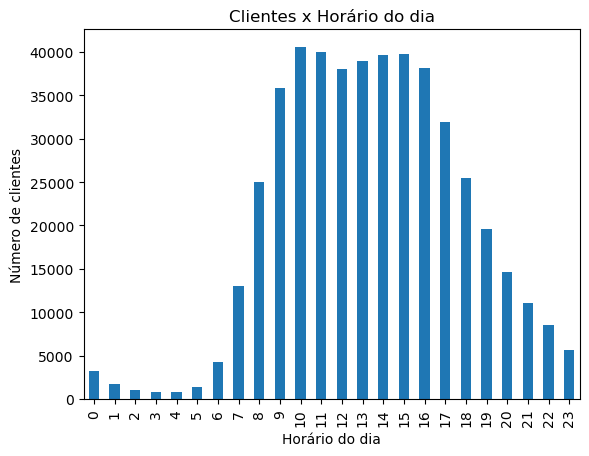

In [40]:
group_ph = df_insta.groupby('order_hour_of_day')['user_id'].count()
group_ph.plot(x='order_hour_of_day', y=group_ph, kind='bar', xlabel='Horário do dia', ylabel='Número de clientes', title='Clientes x Horário do dia');

<span style="color:green;">Olhando o Gráfico, podemos notar que a maioria dos clientes fazem pedidos entre 7h da manhã até 20h da noite, que é o período onde a maioria dos pedidos estão concentrados. Notamos um pico entre 9h e 17h que é o horário comercial.</span>

### [A3] Comparação dos dias da semana que os clientes fazem compras:

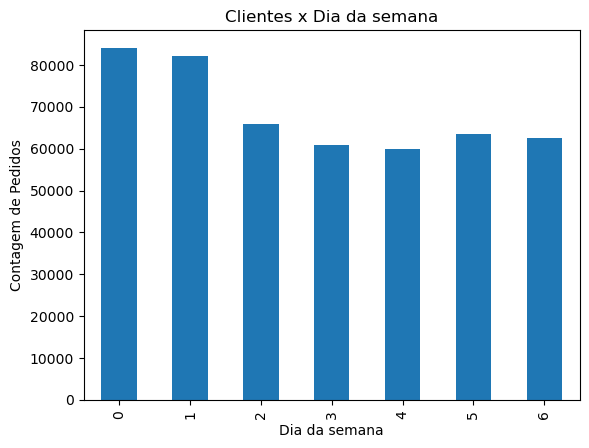

In [41]:
group_pc = df_insta.groupby('order_dow')['order_id'].count()
group_pc.plot(x='order_dow', y=group_pc, kind='bar', xlabel='Dia da semana', ylabel='Contagem de Pedidos', title='Clientes x Dia da semana');

<span style="color:green;">Os pedidos estão bem distribuidos durante a semana, porém com destaque maior para Sábado e Domingo, que é quando provavelmente as pessoas possuem mais tempo para usar a plataforma.</span>

### [A4] Tempo em que as pessoas esperam até fazer outro pedido:

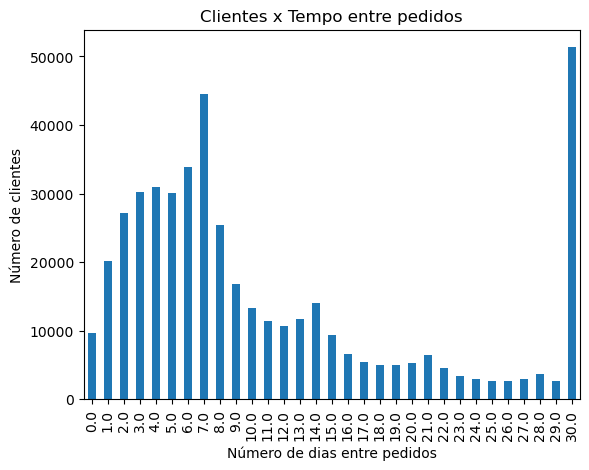

In [42]:
group_pop = df_insta.groupby('days_since_prior_order')['user_id'].count()
group_pop.plot(x='days_since_prior_order', y=group_pop, kind='bar', xlabel='Número de dias entre pedidos', ylabel='Número de clientes', title='Clientes x Tempo entre pedidos');

<span style="color:green;">Olhando para o gráfico, notou-se que muitos clientes esperam entre 1 e 9 dias, porém podemos notar também que houve um pico em um período de 30 dias, onde cerca de 50000 clientes esperam para voltar a fazer um novo pedido.</span>

# [B] Verificando os pedidos em horas do dia e dia da semana e também quais são os produtos mais vendidos:


### [B1] Diferenças entre quartas-feiras e sábados em `'order_hour_of_day'` (hora do dia):

In [44]:
df_filtered_wedsat = df_insta[(df_insta['order_dow'] == 3) | (df_insta['order_dow'] == 6)]
group_df = df_filtered_wedsat.groupby(['order_dow', 'order_hour_of_day']).agg(contagem=('order_id', 'nunique')).reset_index()
group_df.head()

,order_dow,order_hour_of_day,contagem
0,3,0,373
1,3,1,215
2,3,2,106
3,3,3,101
4,3,4,108


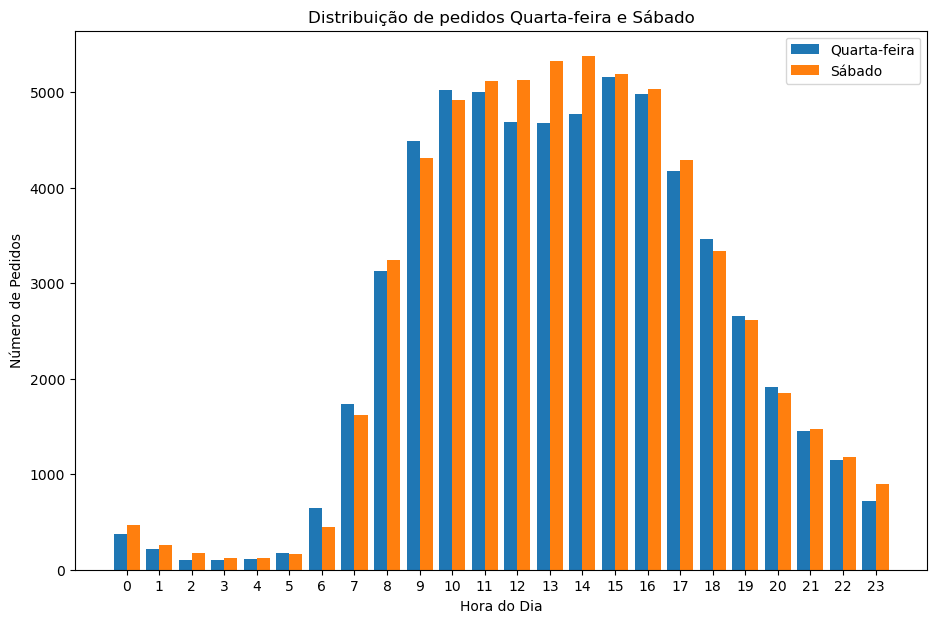

In [45]:
wednesday = group_df[group_df['order_dow'] == 3]
saturday = group_df[group_df['order_dow'] == 6]

plt.figure(figsize=(11, 7)) 
plt.bar(wednesday.order_hour_of_day - 0.2, wednesday.contagem, width=0.4, label='Quarta-feira') 
plt.bar(saturday.order_hour_of_day + 0.2, saturday.contagem, width=0.4, label='Sábado') 
plt.xlabel('Hora do Dia') 
plt.ylabel('Número de Pedidos') 
plt.title('Distribuição de pedidos Quarta-feira e Sábado') 
plt.xticks(range(24)) 
plt.legend() 
plt.show()

<span style="color:green;">Olhando para o gráfico, conseguimos notar que não há uma diferença significativa entre sd Quartas-feiras e Sábados para os clientes fazerem os pedidos.</span>

### [B2] Distribuição do número de pedidos por cliente:

In [47]:
group_distribution = df_insta.groupby('user_id')['order_id'].count()
group_distribution.head(10)

user_id
2     2
4     2
5     1
6     2
7     2
10    1
11    2
12    1
13    3
14    4
Name: order_id, dtype: int64

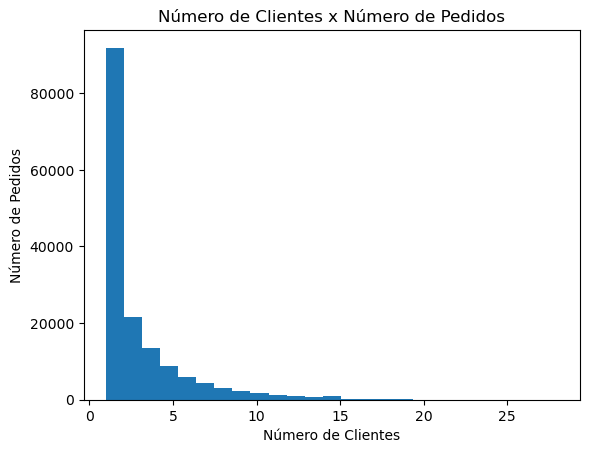

In [50]:
group_distribution.plot(x='user_id', y=group_distribution, kind='hist', title='Número de Clientes x Número de Pedidos', bins=25)
plt.xlabel('Número de Clientes')
plt.ylabel('Número de Pedidos');

<span style="color:green;">Nota-se que a distribuição dos pedidos está mais concentrada em clientes que fazem os pedidos entre 0 e 5 produtos.</span>

### [B3] Os 20 produtos mais populares entre os clientes:

In [47]:
df_ord_by_prod = df_ord.groupby('product_id').agg(n_order=('order_id', 'nunique')).sort_values(by='n_order', ascending=False).reset_index().head(20)
df_ord_by_prod

,product_id,n_order
0,24852,66050
1,13176,53297
2,21137,37039
3,21903,33971
4,47209,29773
5,47766,24689
6,47626,21495
7,16797,20018
8,26209,19690
9,27845,19600


**Atribuindo as colunas `'product_id'` e `'product name'` do Dataframe de Produtos à uma nova variável:**

In [48]:
df_dict_prod_id_name = df_prod[['product_id', 'product_name']].copy().drop_duplicates()
df_dict_prod_id_name

,product_id,product_name
0,1,Chocolate Sandwich Cookies
1,2,All-Seasons Salt
2,3,Robust Golden Unsweetened Oolong Tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...
4,5,Green Chile Anytime Sauce
...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR
49692,49693,SPRING WATER BODY WASH


**Utilizando o `merge()` entre as duas variáveis criadas acima para chegar nos 20 produtos mais vendidos:**

In [49]:
df_prod_top_20 = df_dict_prod_id_name.merge(df_ord_by_prod, on='product_id')
df_prod_top_20.sort_values(by='n_order', ascending=False).reset_index(drop=True)

,product_id,product_name,n_order
0,24852,Banana,66050
1,13176,Bag of Organic Bananas,53297
2,21137,Organic Strawberries,37039
3,21903,Organic Baby Spinach,33971
4,47209,Organic Hass Avocado,29773
5,47766,Organic Avocado,24689
6,47626,Large Lemon,21495
7,16797,Strawberries,20018
8,26209,Limes,19690
9,27845,Organic Whole Milk,19600


<span style="color:green;">Os 20 produtos mais vendidos são esses acima.</span>

# [C] Itens que normalmente os clientes compram em um pedido e os 20 produtos mais frequentes em pedido repetidos:


### [C1] Número de itens que normalmente os clientes compram em um pedido:

In [54]:
df_ord_by_qtde = df_ord.groupby('order_id').agg(n_product=('product_id', 'count')).sort_values(by='n_product', ascending=False).reset_index()
df_ord_by_qtde.head(10)

,order_id,n_product
0,61355,127
1,3308010,115
2,2136777,108
3,171934,104
4,1959075,98
5,102236,95
6,1730767,95
7,1800005,92
8,2926893,92
9,1386261,91


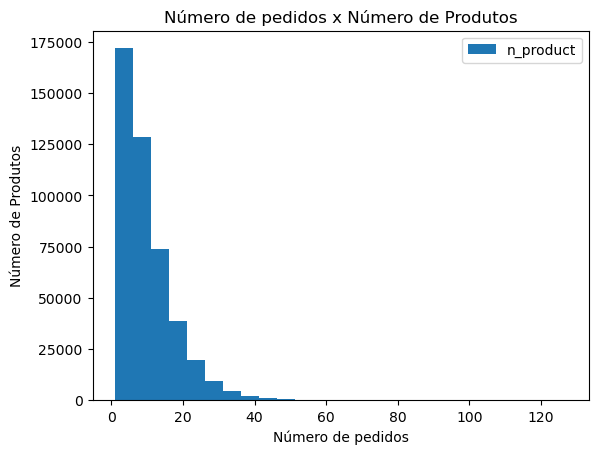

In [56]:
df_ord_by_qtde.plot(x='order_id', y='n_product', kind='hist', title='Número de pedidos x Número de Produtos', bins=25)
plt.xlabel('Número de pedidos')
plt.ylabel('Número de Produtos');

**Calculando a `média` e a `mediana`:**

In [58]:
print("A média de produtos que os clientes compram em um pedido é: ", df_ord_by_qtde['n_product'].mean())
print()
print("A mediana é: ", df_ord_by_qtde['n_product'].median())

A média de produtos que os clientes compram em um pedido é:  10.098983215049127

A mediana é:  8.0


<span style="color:green;">O que podemos notar é que a maioria das ordens de pedidos está com concentrada entre 0 e 20 produtos dentro da ordem. E sua média e mediana representam bem os dados do gráfico..</span>

### [C2] 20 principais itens nos pedidos repetidos:

**Identificando os pedidos repetidos:**

In [57]:
df_ord['reordered_new'] = df_ord[df_ord['reordered'] == 1]['reordered']
df_ord.head(20)

,order_id,product_id,add_to_cart_order,reordered,reordered_new
0,2141543,11440,17.0,0,NaN
1,567889,1560,1.0,1,1.0
2,2261212,26683,1.0,1,1.0
3,491251,8670,35.0,1,1.0
4,2571142,1940,5.0,1,1.0
5,2456893,21616,4.0,1,1.0
6,644579,12341,5.0,1,1.0
7,2231852,44925,10.0,1,1.0
8,3185766,36259,14.0,1,1.0
9,420019,23315,4.0,1,1.0


**Criando uma tabela para mostrar os pedidos que foram repetidos e o número do pedido:**

In [54]:
df_ord_by_rep = df_ord.groupby(['product_id', 'reordered_new']).agg(n_order=('order_id', 'nunique')).sort_values(by='n_order', ascending=False).reset_index().head(20)
df_ord_by_rep

,product_id,reordered_new,n_order
0,24852,1.0,55763
1,13176,1.0,44450
2,21137,1.0,28639
3,21903,1.0,26233
4,47209,1.0,23629
5,47766,1.0,18743
6,27845,1.0,16251
7,47626,1.0,15044
8,27966,1.0,14748
9,16797,1.0,13945


**Atribuindo as colunas `'product_id'` e `'product name'` do Dataframe de Produtos à uma nova variável:**

In [55]:
df_dict_prod_id_name = df_prod[['product_id', 'product_name']].copy().drop_duplicates()
df_dict_prod_id_name

,product_id,product_name
0,1,Chocolate Sandwich Cookies
1,2,All-Seasons Salt
2,3,Robust Golden Unsweetened Oolong Tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...
4,5,Green Chile Anytime Sauce
...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR
49692,49693,SPRING WATER BODY WASH


**Utilizando o `merge()` entre as duas variáveis criadas acima para chegar nos 20 produtos mais populares entre os pedidos repetidos:**

In [56]:
df_prod_top_20_reord = df_dict_prod_id_name.merge(df_ord_by_rep, on='product_id')
df_prod_top_20_reord.sort_values(by='n_order', ascending=False).reset_index(drop=True)

,product_id,product_name,reordered_new,n_order
0,24852,Banana,1.0,55763
1,13176,Bag of Organic Bananas,1.0,44450
2,21137,Organic Strawberries,1.0,28639
3,21903,Organic Baby Spinach,1.0,26233
4,47209,Organic Hass Avocado,1.0,23629
5,47766,Organic Avocado,1.0,18743
6,27845,Organic Whole Milk,1.0,16251
7,47626,Large Lemon,1.0,15044
8,27966,Organic Raspberries,1.0,14748
9,16797,Strawberries,1.0,13945


<span style="color:green;">Esses 20 acima são os produtos mais populares nos pedidos repetidos e nota-se uma semelhança com a tabela dos 20 produtos mais vendidos pela plataforma também.</span>

# Conclusão geral do projeto:

Conclusões com esse projeto:
- A plataforma recebe muitos pedidos durante toda a semana e está muito bem distribuídos os dias, porém um pequeno destaque para o final de semana que é quando eu acredito que as pessoas possuem mais tempo para acessar a plataforma e fazer o pedido.
- Os pedidos são mais concentramos em horário comercial, entre 9h e 17h, porém podemos notar que os clientes fazem pedidos até de madrugada.
- Notamos também que a maioria dos valores ausentes na coluna 'days_since_prior_order' foram pessoas que provavelmente colocaram o pedido no carrinho e não finalizaram a compra, um total de 28817 que é um bom número para trabalhar na análise.
- Outra análise interessante é que muitos clientes esperam entre 1 e 9 dias para fazer um novo pedido, porém tivemos um pico em um período de 30 dias, onde cerca de 50000 clientes esperam para voltar a fazer um novo pedido.
- Outra dado importante de se notar é que os 20 produtos mais populares se assemelham aos 20 produtos mais comuns nos pedidos repetidos.
- Outro ponto importante é que a maioria das ordens de pedidos está concentrada entre 0 e 20 produtos com uma média de 10,09 produtos por ordem e uma mediana de 8 produtos, ilustrando bem a concentração dos pedidos.
- Por fim, pode-se notar que a maioria dos clientes fazem um pedido entre 0 e 5 produtos na ordem do pedido.